# Library

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from module_KTX_KK import * 
from preprocessing_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *

JAVA is in the system path?:  False
JAVA is in the system path?:  Adding...
Operation Machine:  Intel64 Family 6 Model 186 Stepping 2, GenuineIntel
Operation Platform:  64bit
OS Type:  Windows
OS Version:  10
Python Version:  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


2024-08-13 22:38:51,142	INFO worker.py:1612 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Descriptive Statistics

In [18]:
# 데이터로딩 및 전처리
file_name = 'df_KTX_monthmean_KK.csv'
df = pd.read_csv(os.path.join('.', 'Data', file_name)).iloc[:,1:]

In [19]:
df_stat = df.groupby(['주운행선', '전체주중주말'])['승차인원수'].describe()[['mean', 'std', 'max']].astype(int)
df_stat.columns = ['월별 승차인원수 평균', '월별 승차인원수 표준편차', '월별 승차인원수 최대값']
display(df_stat)

월별 승차인원수 평균  월별 승차인원수 표준편차  월별 승차인원수 최대값
주운행선 전체주중주말                                          
경부선  전체            81179          38327        125628
     주말            95722          46141        156824
     주중            73707          35172        134920
경전선  전체            14104           6747         24107
     주말            16678           8217         29279
     주중            12768           6100         24445
동해선  전체            11442           6029         20391
     주말            12853           6883         23417
     주중            10891           5823         22205
전라선  전체            14336           7627         27828
     주말            17148           9228         33672
     주중            12831           6937         28329
호남선  전체            23001          10499         36109
     주말            26974          12722         42793
     주중            21006           9645         37723

경부선
Numerical Scaling... ( 2024-08-09 21:52:50.968173 )


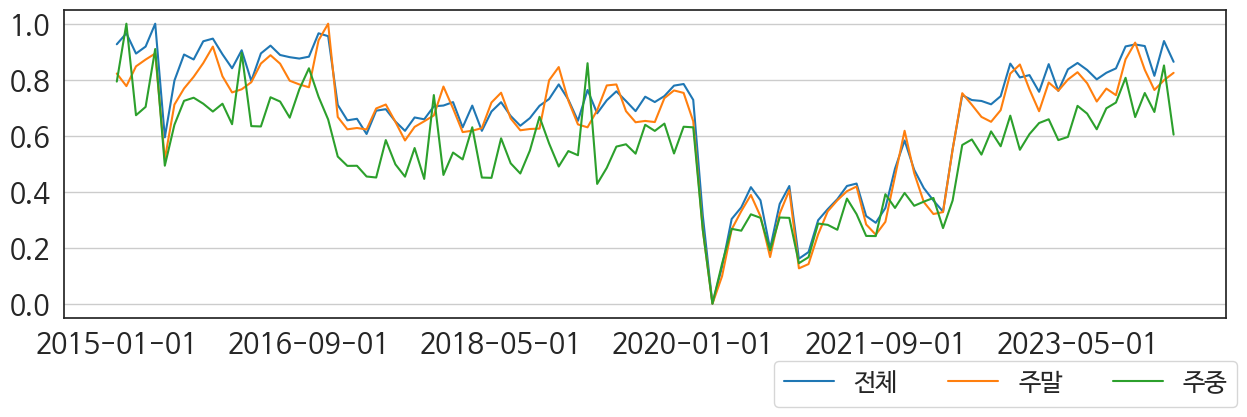

경전선
Numerical Scaling... ( 2024-08-09 21:52:51.049407 )


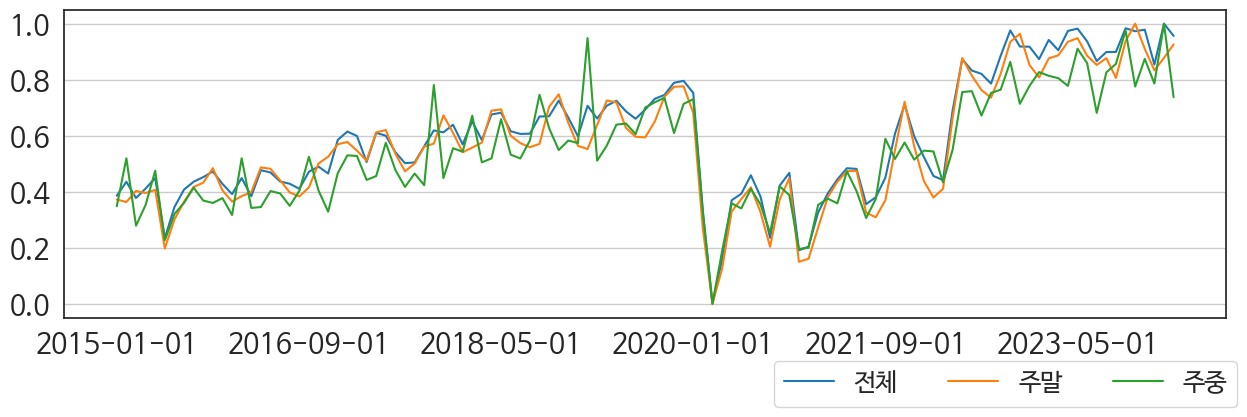

동해선
Numerical Scaling... ( 2024-08-09 21:52:51.132030 )


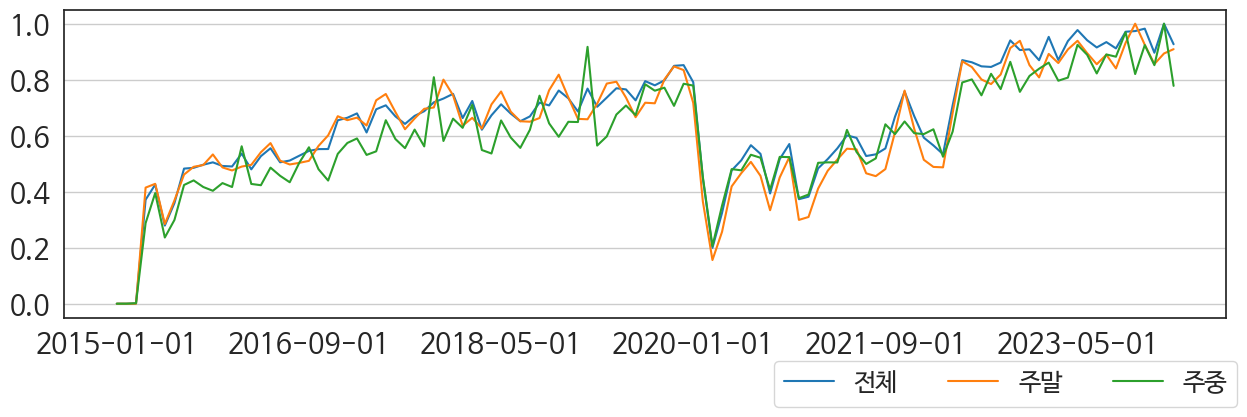

전라선
Numerical Scaling... ( 2024-08-09 21:52:51.214469 )


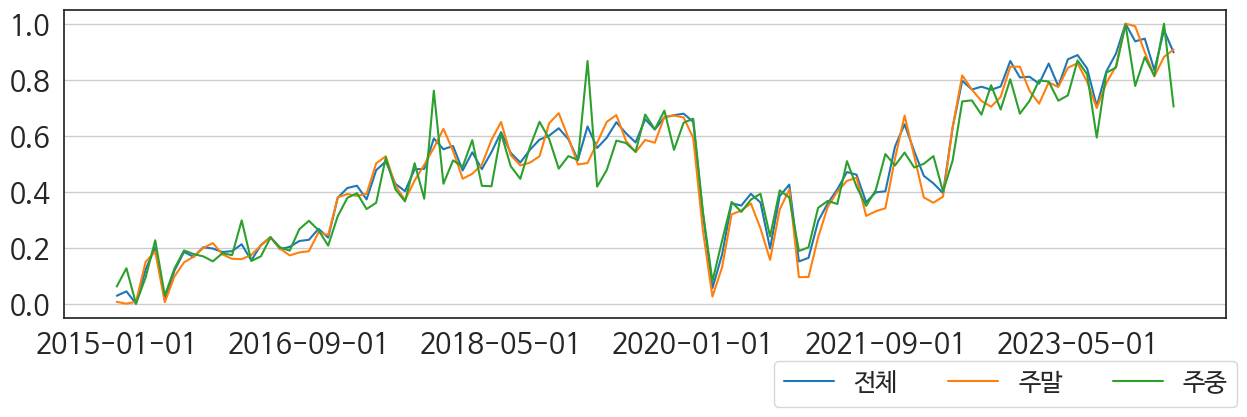

호남선
Numerical Scaling... ( 2024-08-09 21:52:51.296870 )


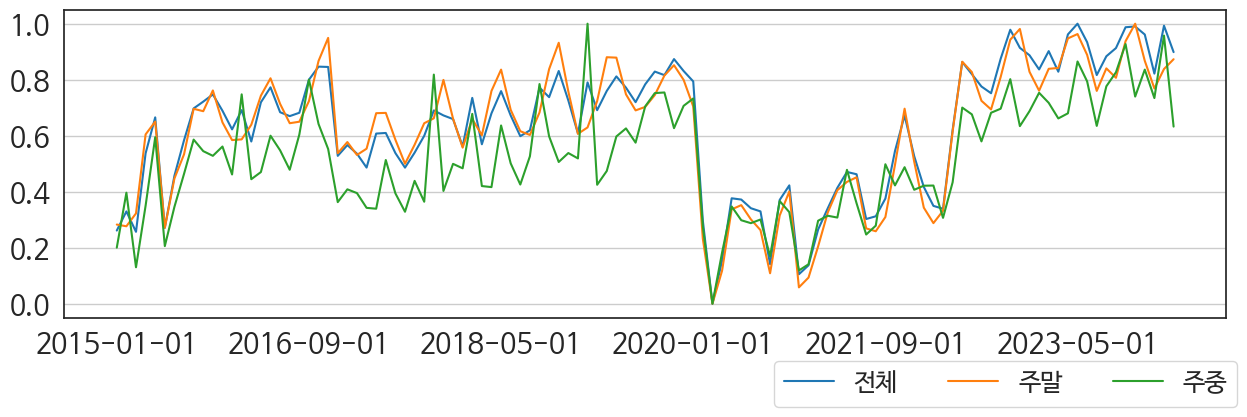

In [20]:
df_time = df.groupby(['전체주중주말', '주운행선', '운행년월'])['승차인원수'].sum().unstack(level=0).reset_index()

for period in df_time['주운행선'].unique():
    print(period)
    df_sub = df_time[df_time['주운행선'] == period]
    df_sub.set_index('운행년월', inplace=True)
    df_sub = df_sub.loc[df_sub.index <= '2024-03-01'].iloc[:,1:]
    plot_timeseries_dforigin(df_sub, scaled=True, figsize=(15,4), 
                             xlabel='', legend_colnum=5, save_local=False)

전체
Numerical Scaling... ( 2024-08-09 21:52:51.811277 )


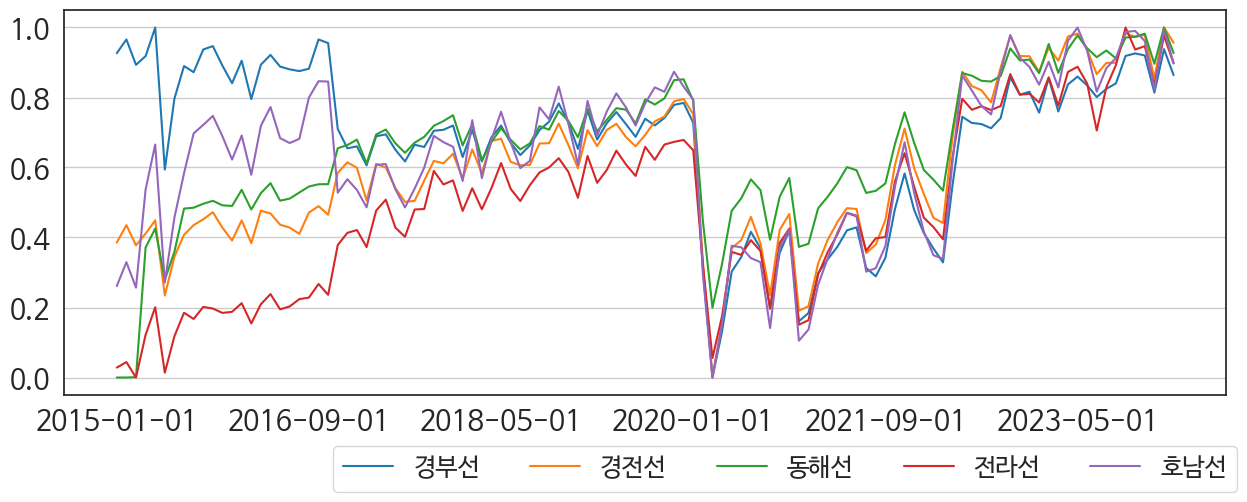

주말
Numerical Scaling... ( 2024-08-09 21:52:51.905495 )


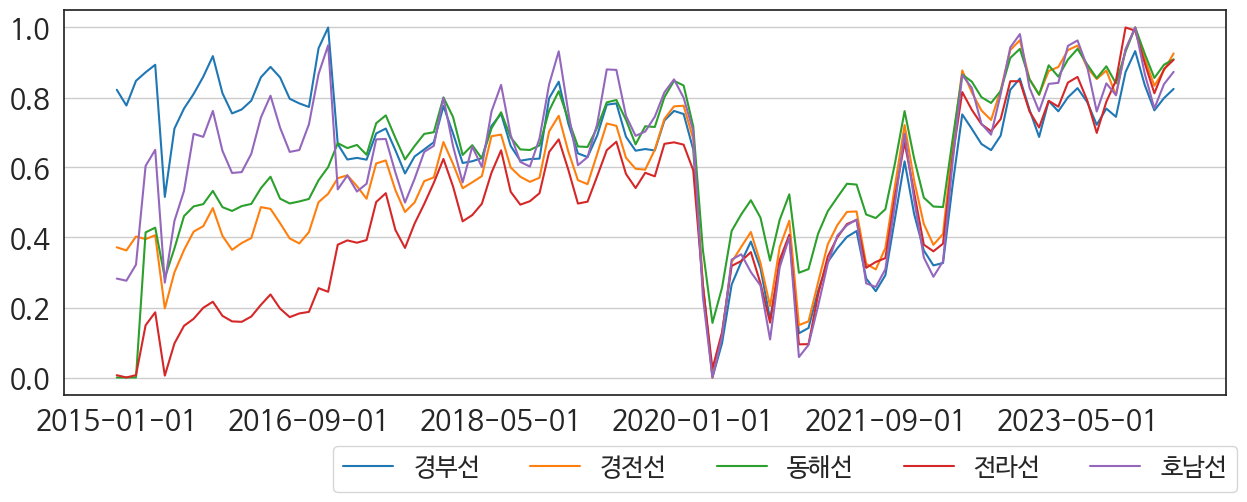

주중
Numerical Scaling... ( 2024-08-09 21:52:52.004865 )


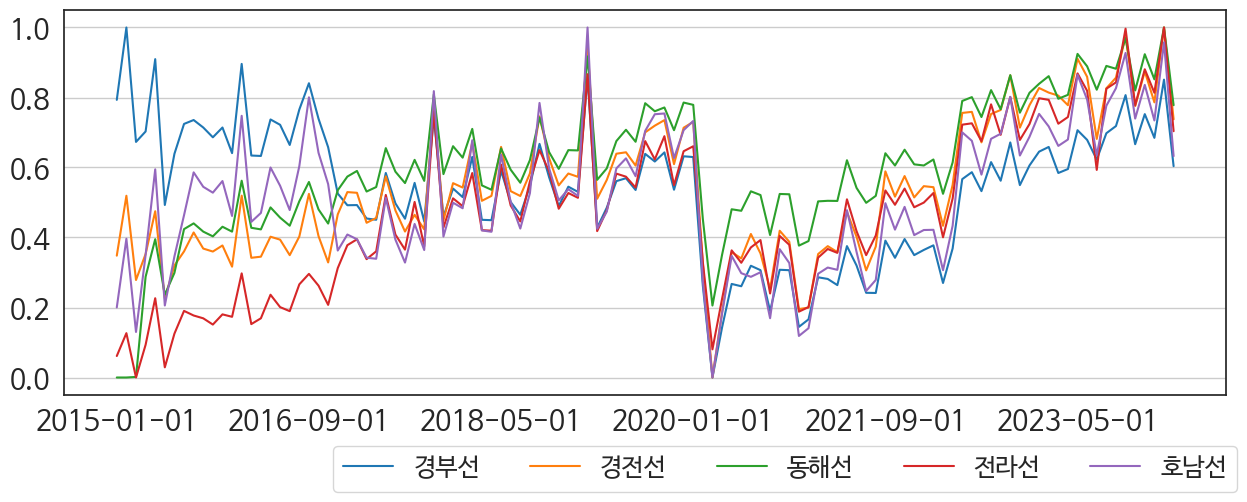

In [21]:
df_time = df.groupby(['전체주중주말', '주운행선', '운행년월'])['승차인원수'].sum().unstack(level=1).reset_index()

for period in df_time['전체주중주말'].unique():
    print(period)
    df_sub = df_time[df_time['전체주중주말'] == period]
    df_sub.set_index('운행년월', inplace=True)
    df_sub = df_sub.loc[df_sub.index <= '2024-03-01'].iloc[:,1:]
    plot_timeseries_dforigin(df_sub, scaled=True, figsize=(15,5), xlabel='', legend_colnum=5, save_local=False)